In [1]:
import astropy.units as u
import numpy as np
import popsims
import matplotlib.pyplot as plt
import astropy.coordinates as astro_coord
import glob
import pandas as pd

import itertools
from scipy import stats

from popsims.plot_style import  plot_style
plot_style()

#from shapey import Box
#paths
path_plot ='../figures/'
path_data = '../data/stream/'
path_images = '../data/images/'
isochrone_path='../data/isochrones/'


In [2]:
def read_orbit_file(filename):
    return np.load(path_data+'/{}'.format(filename), allow_pickle=True)

def plot_density(r, grid, ax):
    vals=[]
    dx= grid[1]-grid[0]
    for g in grid:
        n= len(r[np.logical_and(r>=g,r<=g+dx)])
        vals.append(n/dx)
        
    ax.plot(grid, vals, linewidth=3)
    return 

def rotate(x, y, ang, c=(0,0)):
    """
    Angle must be in radians
    """
    
    #rotation matrix
    r=[[np.cos(ang), -np.sin(ang)],
       [np.sin(ang), np.cos(ang)]]
    
    i=np.identity(2)
    
    mat=np.matrix([[r[0][0], r[0][1], np.dot(i-r, c)[0]],
                   [r[1][0], r[1][1], np.dot(i-r, c)[1]],
                   [0., 0., 1.]])

    z=np.ones_like(x)
    
    rotated=np.array(np.dot(mat, np.array([x, y, z])))
    
    return rotated[0], rotated[1] 

def visualize_stream(rgc, xlim, ylim, xgrid, vhalo, offset=1):
    
    #unperturbed

    fig, (ax, ax1)=plt.subplots(figsize=(12, 4), ncols=2)
    filename='orgininalpal5_rgc{}'.format(rgc)
    f=path_data+'/{}.npy'.format(filename)
    filenames=np.array(glob.glob(f))
    st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']
    #ax.scatter(st0.y.value, st0.x.value+1, s=.05, alpha=0.1, c='k')
    #ax.text(3, np.nanmean(st0.x.value[st0.y.value>0])+1 ,
    #    "Unperturbed",c='b', fontsize=12)
    center=np.nanmedian(np.array(rgc.split('_')).astype(float))
    
    x0, y0=st0.y.value, st0.x.value
    #mask= ((x0-np.nanmedian(x0))**2+(y0-np.nanmedian(y0))**2)**0.5<5
    mask= (x0-np.nanmedian(x0))>0.
    line = np.polyfit(x0[mask], y0[mask], 1)
    angle=np.arctan(line[0])
    x0, y0=rotate(x0, y0, -angle, c=(np.nanmedian(x0), np.nanmedian(y0)))
    ax.scatter(x0, y0, s=.05, alpha=0.1, c='k')
    plot_density(x0, xgrid, ax1)
    
    
    mhalo=2e6
    #filename='pal5_rgc{}_no_selfgrav_mhalo{:.2e}_vhalo{:.0f}_distance_to_hit{}'.format(rgc, mhalo, vhalo, distance_to_hit )
    filename='pal5_rgc{}_mhalo{:.2e}_vhalo{:.0f}_distance_to_hit{}'.format(rgc, mhalo, vhalo, distance_to_hit )
    
    f=path_data+'/{}.npy'.format(filename)
    filenames=np.array(glob.glob(f))
    st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']
    
    #deptermine optimal rotation angle by fitting a line to the stream
    x0, y0=st0.y.value, st0.x.value+offset
    #mask= ((x0-np.nanmedian(x0))**2+(y0-np.nanmedian(y0))**2)**0.5<5
    mask= (x0-np.nanmedian(x0))>0.
    line = np.polyfit(x0[mask], y0[mask], 1)
    angle=np.arctan(line[0])
    x0, y0=rotate(x0, y0, -angle, c=(np.nanmedian(x0), np.nanmedian(y0)))
    ax.scatter(x0, y0, s=.05, alpha=0.1, c='k')
    #ax.text(3, np.nanmean(st0.x.value[st0.y.value>0]+2) ,
    #    " {:.0e} Msun".format(mhalo) ,c='b', fontsize=12)

    plot_density(x0, xgrid, ax1)

    mhalo=5e6
    #filename='pal5_rgc{}_mhalo{:.2e}_vhalo{:.0f}'.format(rgc, mhalo, vhalo)
    filename='pal5_rgc{}_mhalo{:.2e}_vhalo{:.0f}_distance_to_hit{}'.format(rgc, mhalo, vhalo, distance_to_hit )
    f=path_data+'/{}.npy'.format(filename)
    filenames=np.array(glob.glob(f))
    st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']
    
    #ax.scatter(st0.y.value, st0.x.value+3, s=.05, alpha=0.1, c='k')
    #ax.text(3, np.nanmean(st0.x.value[st0.y.value>0]+3) ,
    #    " {:.0e} Msun".format(mhalo) ,c='b', fontsize=12)
    x0, y0=st0.y.value, st0.x.value+2*offset
    mask= (x0-np.nanmedian(x0))>0.
    line = np.polyfit(x0[mask], y0[mask], 1)
    angle=np.arctan(line[0])
    x0, y0=rotate(x0, y0, -angle, c=(np.nanmedian(x0), np.nanmedian(y0)))
    ax.scatter(x0, y0, s=.05, alpha=0.1, c='k')
    plot_density(x0, xgrid, ax1)

    mhalo=1e7
    #filename='pal5_rgc{}_mhalo{:.2e}_vhalo{:.0f}'.format(rgc, mhalo, vhalo)
    filename='pal5_rgc{}_mhalo{:.2e}_vhalo{:.0f}_distance_to_hit{}'.format(rgc, mhalo, vhalo, distance_to_hit )
    f=path_data+'/{}.npy'.format(filename)
    filenames=np.array(glob.glob(f))
    st0=(read_orbit_file(filenames[-1].split('/')[-1]).flatten()[0])['stream']
    #ax.scatter(st0.y.value, st0.x.value+4, s=.05, alpha=0.1, c='k')
    #ax.text(3, np.nanmean(st0.x.value[st0.y.value>0]+4) ,
    #    " {:.0e} Msun".format(mhalo) ,c='b', fontsize=12)
    x0, y0=st0.y.value, st0.x.value+3*offset
    #mask= ((x0-np.nanmedian(x0))**2+(y0-np.nanmedian(y0))**2)**0.5<5
    mask= (x0-np.nanmedian(x0))>0.
    line = np.polyfit(x0[mask], y0[mask], 1)
    angle=np.arctan(line[0])
    x0, y0=rotate(x0, y0, -angle, c=(np.nanmedian(x0), np.nanmedian(y0)))
    ax.scatter(x0, y0, s=.05, alpha=0.1, c='k')
    plot_density(x0, xgrid, ax1)


    ax.set(ylim=ylim, xlim=xlim)
    ax.set_xlabel('y (kpc)', fontsize=18)
    ax.set_ylabel('x (kpc) + offset', fontsize=18)
    ax.minorticks_on()

    ax1.set(xlim=xlim)
    ax1.set_xlabel('x (kpc)', fontsize=18)
    ax1.set_ylabel('Number of Stars/Kpc', fontsize=18)

    #add up/vertical arrrows 
    plt.tight_layout()
    
    ax1.minorticks_on()
    ax1.axvline (2.2, linestyle='--', color='k')

    plt.savefig(path_plot+'/streams{}.jpeg'.format(rgc), bbox_inches='tight')
    
    return x0, y0, ax, ax1


In [3]:
#%matplotlib notebook

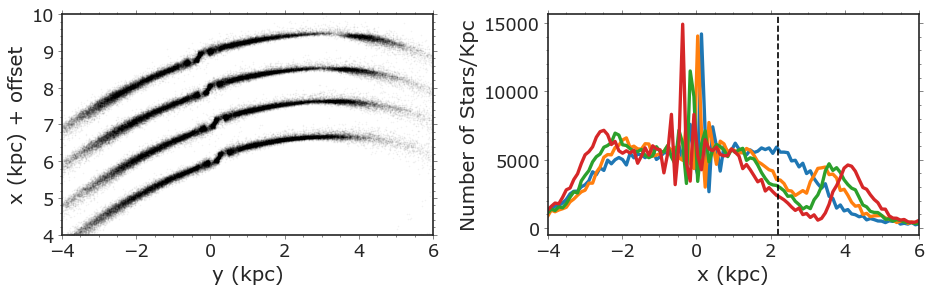

In [4]:
xgrid=np.linspace(-4, 6, 100)
vhalo=-50
distance_to_hit=0.5
#compare and contrast
x0, y0, _, _=visualize_stream('10_20', [-4, 6], [4., 10], xgrid, -50)

In [5]:
xgrid=np.linspace(-10, 15, 100)

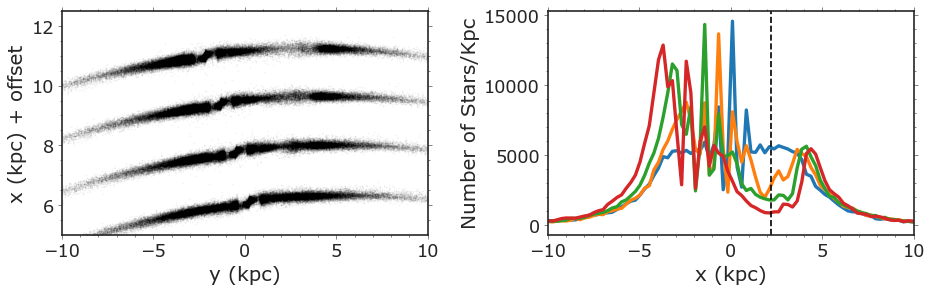

In [6]:
_= visualize_stream('30_40', [-10, 10], [5, 12.5], xgrid, -50, offset=2)

In [13]:
xgrid=np.linspace(20, 40, 100)
distance_to_hit=0.5

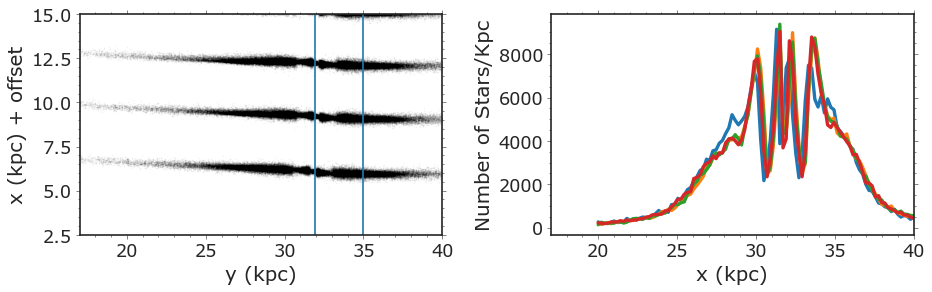

In [14]:
x0, y0, ax, ax1= visualize_stream('50_60', [17, 40], [2.5, 15], xgrid, -50, offset=3)
ax.axvline(35)
ax.axvline(np.nanmedian(x0))

In [15]:
dist_arr=['10_20', '30_40', '50_60']*2
mag_limits=np.concatenate([[27.15]*3, [28.69]*3])
d_galaxy=770*u.kpc
kpc_conversion = np.pi * d_galaxy / 180.
roman_fov= 0.52*u.degree*(kpc_conversion /u.degree)
scaled_arcmin=  10*u.arcmin.to(u.degree)*(kpc_conversion /u.degree).value
mhalo=5e6

from matplotlib import patches

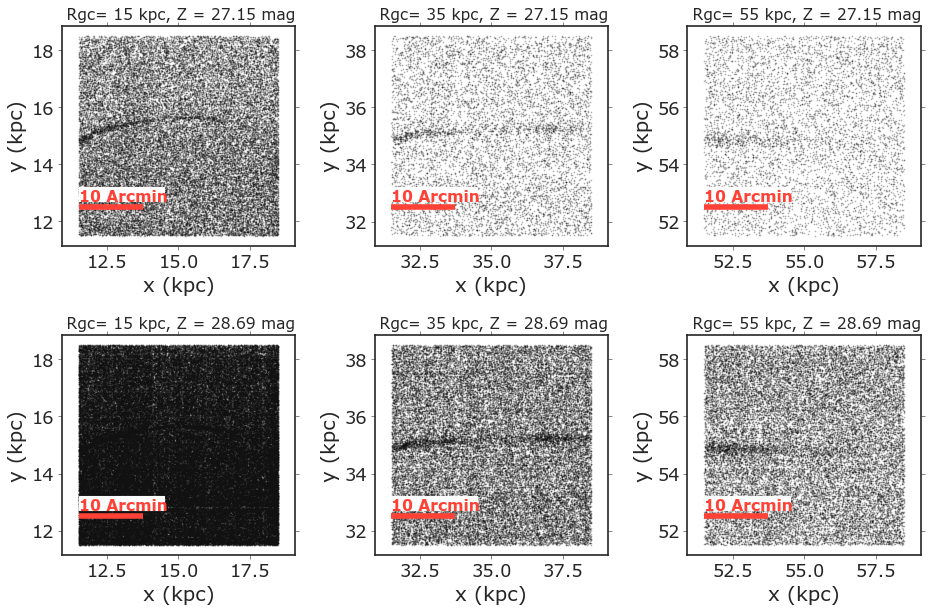

In [16]:
fig, ax=plt.subplots(figsize=(12, 4*2), ncols=3, nrows=2)

for  idx in range(0, 6):
    
    a= np.concatenate(ax)[idx]
    dist= dist_arr[idx]
    mag_limit=mag_limits[idx]
    #get backgrounds
    
    rgc=np.nanmedian(np.array(dist.split('_')).astype(float))
    
    center=np.array([0, 0 ])+rgc
    
    fname= glob.glob(path_images+'/images_rgc{}_mhalo{:.2e}_maglimit{}*'.format(dist, mhalo, mag_limit))[0]
    rst=np.load(fname)
    a.scatter(rst[0], rst[1],  s=0.1, alpha=0.5, color='#111111')
    
    a.set(xlabel='x (kpc)', ylabel='y (kpc)')
    a.set_title(' Rgc= {:.0f} kpc, Z = {} mag'.format(rgc, mag_limit), fontsize=14)
    a.set_xlabel('x (kpc)', fontsize=18)
    a.set_ylabel('y (kpc)', fontsize=18)
    
    a.axis('equal')
    a.axis('equal')
    
   
    a.hlines(y=np.nanmin(rst[0])+1, xmin= np.nanmin( rst[0]), xmax=np.nanmin( rst[0])+scaled_arcmin, \
             linewidth=5, color='#FF4136')
    
    rect = patches.Rectangle( (np.nanmin( rst[0]), np.nanmin(rst[0])+1.2), \
                               3, 0.5, linewidth=1, edgecolor='#FFFFFF', facecolor='#FFFFFF')

    # Add the patch to the Axes
    a.add_patch(rect)
    a.text(np.nanmin( rst[0]), np.nanmin(rst[0])+1.2, '10 Arcmin',\
           color='#FF4136', alpha=1, fontsize=14, weight='bold')

    

plt.tight_layout()


#plt.savefig(path_plot+'/gaps_at_M31_mhalo{:.2e}.jpeg'.format(mhalo), rasterized=True)


In [17]:
#---> CHECK THE LUMINOSITY FUNCTION (NUMNBER OF STARS PER MAGNITUDE)
# 

In [18]:
from popsims import sample_from_powerlaw
path_isochrone='../data/isochrones/'
isochrone_path=path_isochrone
mag_keys=['gmag', 'imag', 'F062mag', 'F087mag']
from scipy.interpolate import interp1d, griddata
def count_pal5_stars_old(mag_limit, dmod):
    import scipy.interpolate as interp
    dmod_pal5=16.85

    cfht_mini = np.loadtxt(isochrone_path+'/Isochrone_CFHT_PARSEC_withDust_newZ.txt', skiprows = 8, usecols = [2])
    cfht_gmag = np.loadtxt(isochrone_path+'/Isochrone_CFHT_PARSEC_withDust_newZ.txt', skiprows = 8, usecols = [24])
    cfht_imag = np.loadtxt(isochrone_path+'/Isochrone_CFHT_PARSEC_withDust_newZ.txt', skiprows = 8, usecols = [25])
    wfirst_mini = np.loadtxt(isochrone_path+'/Isochrone_WFIRST_PARSEC_withDust_newZ.txt', skiprows = 8, usecols = [2])
    wfirst_mags = np.loadtxt(isochrone_path+'/Isochrone_WFIRST_PARSEC_withDust_newZ.txt', skiprows = 8, usecols = [23,24,25,26,27,28,29])

    sample_lowmasses=sample_from_powerlaw(-0.5, xmin=np.min(cfht_mini), xmax=np.max(cfht_mini), nsample=int(1e6)) 
    inter_gmags = interp.interp1d(cfht_mini, cfht_gmag)
    inter_imags = interp.interp1d(cfht_mini, cfht_imag)
    inter_Rmags = interp.interp1d(wfirst_mini, wfirst_mags[:,0])
    inter_Zmags = interp.interp1d(wfirst_mini, wfirst_mags[:,1])
    inter_Ymags = interp.interp1d(wfirst_mini, wfirst_mags[:,2])
    inter_Jmags = interp.interp1d(wfirst_mini, wfirst_mags[:,3])
    inter_Hmags = interp.interp1d(wfirst_mini, wfirst_mags[:,4])
    inter_Fmags = interp.interp1d(wfirst_mini, wfirst_mags[:,5])
    inter_Wmags = interp.interp1d(wfirst_mini, wfirst_mags[:,6])

    if np.sum(sample_lowmasses < np.min(cfht_mini)) > 0 or np.sum(sample_lowmasses > np.max(cfht_mini)) > 0:
        print("outside of interpolation range based on the CFHT-parsec SSP file. Need to resolve this.")
    else:    
        #CFHT magnitudes
        sample_gmags = inter_gmags(sample_lowmasses) +  dmod_pal5  #distance modulus Pal5
        sample_imags = inter_imags(sample_lowmasses) +  dmod_pal5 #distance modulus Pal5
        #WFIRST magnitudes
        sample_Rmags = inter_Rmags(sample_lowmasses) +  dmod_pal5  #distance modulus Pal5
        sample_Zmags = inter_Zmags(sample_lowmasses)+  dmod_pal5 #distance modulus Pal5
        sample_Ymags = inter_Ymags(sample_lowmasses)  +  dmod_pal5 
        sample_Jmags = inter_Jmags(sample_lowmasses)+  dmod_pal5  #distance modulus Pal5
        sample_Hmags = inter_Hmags(sample_lowmasses) +  dmod_pal5 #distance modulus Pal5
        sample_Fmags = inter_Fmags(sample_lowmasses)+  dmod_pal5 #distance modulus Pal5
        sample_Wmags = inter_Wmags(sample_lowmasses) +  dmod_pal5 #distance modulus Pal5
        
        #renormalize the luminosity function by computing a normalization factor
        num_20_23= len(sample_gmags[np.logical_and(sample_gmags>=20, sample_gmags<=23)])
        #print ('number of stars between 20 and 23 G mag {}'.format( num_20_23))

        norm= 3000/num_20_23
        #print (norm)
        
        #compute the difference between distance moduli and offset stars
        dist_mod_And = dmod-dmod_pal5
        #offset_Zmags= sample_Zmags+  dist_mod_And
        nstars_wfirst = (len(np.where((sample_Zmags < (mag_limit-dist_mod_And)  ))[0]))*norm
        return  nstars_wfirst,  sample_Zmags

def count_pal5_stars(mag_limit, dmod):
    dmod_pal5=16.85
    def read_pandas_isochrones():
        from astropy.io import ascii
        return ascii.read(path_isochrone+'/cfht_pre2014_isochrones_pal5.txt').to_pandas()
    def read_roman_isochrones():
        from astropy.io import ascii
        return ascii.read(path_isochrone+'/roman_isochrones_vega_pal5.txt').to_pandas()
    
    
    cfht=read_pandas_isochrones()
    roman= read_roman_isochrones()
    #comb= pd.concat([cfht, roman]).reset_index()
    
    
    
    
    isos={}
    for k in mag_keys:
        
        masses=None
        
        if k.startswith('F'):
            x= roman.Mini.values
            y=roman[k].values
            nsample=1e6
            masses= sample_from_powerlaw(-0.5, xmin=roman.Mini.values.min(), \
                                         xmax=roman.Mini.values.max(), \
                                         nsample=nsample)
        if not k.startswith('F'):
            x= cfht.Mini.values
            y=cfht[k].values
            nsample=1e6
            masses= sample_from_powerlaw(-0.5, xmin=cfht.Mini.values.min(), \
                                         xmax=cfht.Mini.values.max(), \
                                         nsample=nsample)
        nans=np.logical_or(np.isnan(x), np.isnan(y))
        isos['mass']= masses
        #f=griddata(x[~nans], y[~nans], np.log10(masses) , fill_value=np.nan, method='linear', rescale=True)
        
        f=interp1d(x[~nans], y[~nans], fill_value =np.nan, bounds_error=False)(masses)
        isos.update({k: f+dmod_pal5})
    
    df=pd.DataFrame(isos)
    
    num_20_23= len(df.gmag.values[np.logical_and(df.gmag.values>=20, df.gmag.values<=23)])
    norm= (3000/num_20_23)
    #print (norm)
    
    #compute the difference between distance moduli and offset stars
    dist_mod_And = dmod-dmod_pal5

    #return len(df.F087mag.values[df.F087mag.values<(mag_limit-dist_mod_And)])*norm
    return (len(np.where((df.F087mag.values < (mag_limit-dist_mod_And)  ))[0]))*norm, df.F087mag.values


In [19]:
mag_keys

['gmag', 'imag', 'F062mag', 'F087mag']

In [20]:
cfht_mini = np.loadtxt(isochrone_path+'/Isochrone_CFHT_PARSEC_withDust_newZ.txt', skiprows = 8, usecols = [2])
cfht_gmag = np.loadtxt(isochrone_path+'/Isochrone_CFHT_PARSEC_withDust_newZ.txt', skiprows = 8, usecols = [24])
cfht_imag = np.loadtxt(isochrone_path+'/Isochrone_CFHT_PARSEC_withDust_newZ.txt', skiprows = 8, usecols = [25])
wfirst_mini = np.loadtxt(isochrone_path+'/Isochrone_WFIRST_PARSEC_withDust_newZ.txt', skiprows = 8, usecols = [2])
wfirst_mags = np.loadtxt(isochrone_path+'/Isochrone_WFIRST_PARSEC_withDust_newZ.txt', skiprows = 8, usecols = [23,24,25,26,27,28,29])

sample_lowmasses=sample_from_powerlaw(-0.5, xmin=np.min(cfht_mini), xmax=np.max(cfht_mini), nsample=int(1e6)) 


In [21]:
n, m=count_pal5_stars(28.54, 16.85)

In [22]:
n2, m2=count_pal5_stars_old(28.54, 16.85)

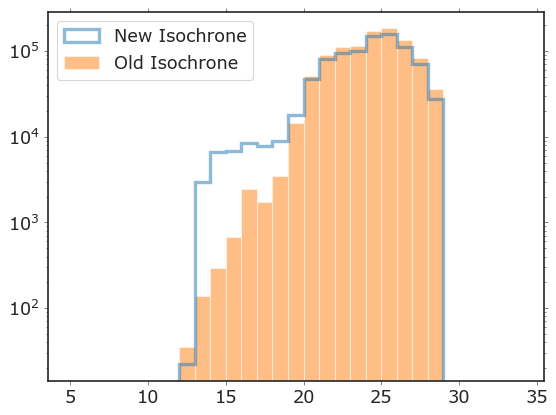

In [23]:
fig, ax=plt.subplots()
_= ax.hist(m, alpha=0.5, bins=np.arange(5, 30), log=True, histtype='step', linewidth=3, label='New Isochrone' )
_= ax.hist(m2, alpha=0.5, bins=np.arange(5, 35), log=True, label='Old Isochrone')
ax.legend()

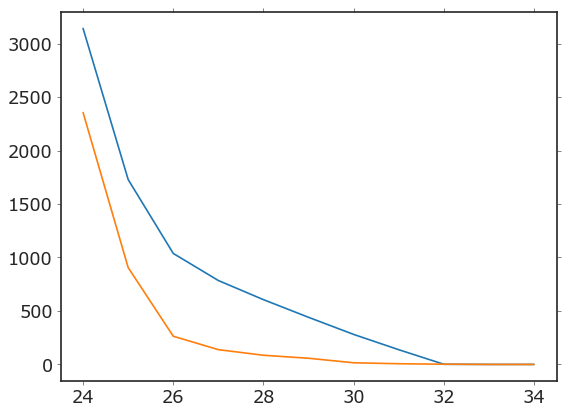

In [24]:
dmods=np.arange(24, 35, 1)
ns0=[count_pal5_stars(28.69, x)[0] for x in dmods]
ns1=[count_pal5_stars_old(28.69, x)[0] for x in dmods]
fig, ax=plt.subplots()
plt.plot(dmods, ns0)
plt.plot(dmods, ns1)
#ax.set(yscale='log'

[(10.0, -2.0), (0.0, 2.5)]

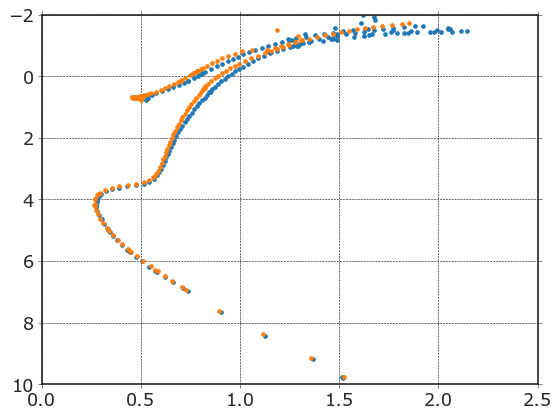

In [25]:
from astropy.io import ascii
df=ascii.read(path_isochrone+'/cfht_pre2014_isochrones_pal5.txt').to_pandas()
df1=ascii.read(isochrone_path+'/Isochrone_CFHT_PARSEC_withDust_newZ.txt').to_pandas()

fig, ax=plt.subplots()
ax.scatter(df1["g'mag"]-df1["i'mag"], df1["g'mag"], s=10)

ax.scatter(df['gmag']-df['imag'], df['gmag'], s=10)
ax.grid()
ax.set(ylim=np.array([10, -2]), xlim=[0, 2.5])

[(38.54, 23.54), (0.0, 1.6)]

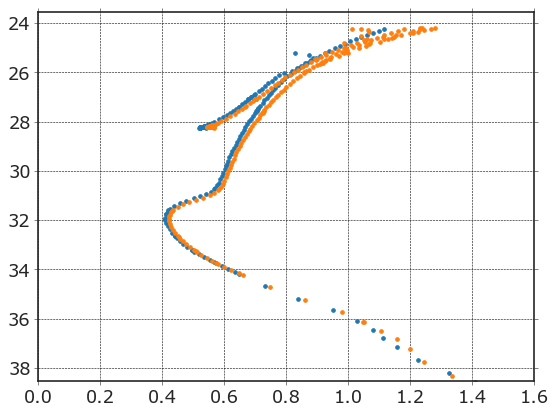

In [26]:
from astropy.io import ascii
df=ascii.read(path_isochrone+'/roman_isochrones_vega_pal5.txt').to_pandas()
df1=ascii.read(path_isochrone+'/Isochrone_WFIRST_PARSEC_withDust_newZ.txt').to_pandas()

fig, ax=plt.subplots()
ax.scatter(df['F062mag']-df['F087mag'], df['F087mag']+28.54, s=10)

ax.scatter(df1['R062mag']-df1['Z087mag'], df1['Z087mag']+28.54, s=10)
ax.grid()
ax.set(ylim=np.array([10, -5])+28.54, xlim=[0, 1.6])

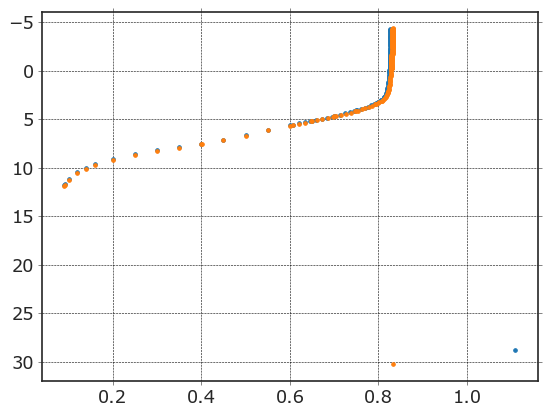

In [27]:
fig, ax=plt.subplots()
ax.scatter(df.Mini, df['F087mag'], s=10)

ax.scatter(df1.Mini, df1['Z087mag'], s=10)
ax.grid()
ax.invert_yaxis()


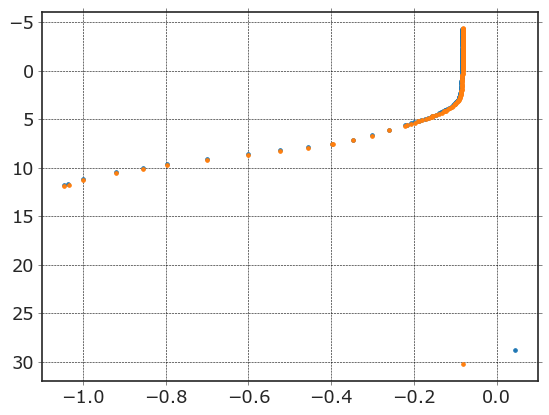

In [28]:
fig, ax=plt.subplots()
ax.scatter(np.log10(df.Mini), df['F087mag'], s=10)

ax.scatter(np.log10(df1.Mini), df1['Z087mag'], s=10)
ax.grid()
ax.invert_yaxis()


In [29]:
24.5-16.85

7.649999999999999